In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import datetime
import time

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
engine.execute('SELECT * FROM measurement ORDER BY date DESC LIMIT 12 ').fetchall()

[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0),
 (7635, 'USC00514830', '2017-08-23', 0.0, 82.0),
 (12187, 'USC00519523', '2017-08-23', 0.08, 82.0),
 (19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (2723, 'USC00519397', '2017-08-22', 0.0, 82.0),
 (12186, 'USC00519523', '2017-08-22', 0.0, 82.0),
 (19549, 'USC00516128', '2017-08-22', 0.5, 76.0),
 (2722, 'USC00519397', '2017-08-21', 0.0, 81.0),
 (7634, 'USC00514830', '2017-08-21', 0.02, 79.0),
 (12185, 'USC00519523', '2017-08-21', None, 82.0),
 (19548, 'USC00516128', '2017-08-21', 0.56, 76.0),
 (2721, 'USC00519397', '2017-08-20', 0.0, 81.0)]

In [7]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [8]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
table_names=Base.classes.keys()
table_names

['measurement', 'station']

In [10]:
# Save references to each table
tables={}
for name in table_names:
    title_name=name.title()
    tables[title_name]=Base.classes[name]
tables

{'Measurement': sqlalchemy.ext.automap.measurement,
 'Station': sqlalchemy.ext.automap.station}

In [11]:
# Create our session (link) from Python to the DB
session=Session(bind=engine)

In [12]:
for each in tables['Measurement'].__dict__:
    print(each)

__table__
__module__
__doc__
_sa_class_manager
__init__
id
station
date
prcp
tobs
__mapper__


In [13]:
for each in tables['Station'].__dict__:
    print(each)

__table__
__module__
__doc__
_sa_class_manager
__init__
id
station
name
latitude
longitude
elevation
__mapper__


# Exploratory Climate Analysis

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
end_date=dt.date(2017, 8, 23)
print(end_date)
start_date=end_date-dt.timedelta(days=365)
print(start_date)
# Perform a query to retrieve the data and precipitation scores
data=session.query(tables['Measurement'].date, tables['Measurement'].prcp).\
filter(tables['Measurement'].date>=start_date).\
filter(tables['Measurement'].date<=end_date).all()
print(len(data))

2017-08-23
2016-08-23
2230


In [16]:
data[:50]

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column
data_cols=['date', 'precipitation']
df=pd.DataFrame(data, columns=data_cols)
df.set_index('date', inplace=True)
# Sort the dataframe by date
df.sort_values('date', ascending=True, inplace=True)
df = df.dropna(how='any')
print(len(df))
df.head(25)

2021


,precipitation
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28


Text(0.5, 0, 'Date')

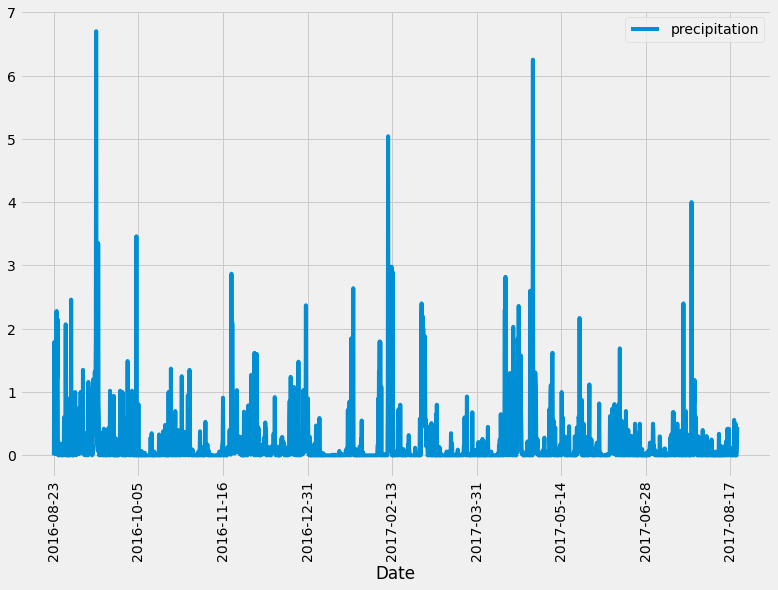

In [19]:
#fig, ax = plt.subplot()
df.plot(rot=90, figsize=(12,8))
plt.xlabel('Date')

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_df=df.precipitation.describe()
summary_df

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

In [21]:
# Design a query to show how many stations are available in this dataset?
stations=session.query(tables['Measurement'].station).distinct().all()
print(f'Total number of stations in the database Measurement table: {len(stations)}')

stations_2=session.query(tables['Measurement'].station, tables['Measurement'].date, tables['Measurement'].prcp).\
filter(tables['Measurement'].date>=start_date).\
filter(tables['Measurement'].date<=end_date).group_by(tables['Measurement'].station).all()
stations_2=pd.DataFrame(stations_2, columns=['station','date', 'prcp'])
print(f'Number of Stations in the filter by date range query: {len(stations_2)}')

Total number of stations in the database Measurement table: 9
Number of Stations in the filter by date range query: 7


In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_activity=session.query(tables['Measurement'].station, func.count(tables['Measurement'].station)).\
group_by(tables['Measurement'].station).order_by(func.count(tables['Measurement'].station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
station_temp_data=session.query(func.min(tables['Measurement'].tobs), func.max(tables['Measurement'].tobs), func.avg(tables['Measurement'].tobs)).\
filter(tables['Measurement'].station=='USC00519281').all()
print(station_temp_data)
station_temp_data=(station_temp_data[0][0], station_temp_data[0][1], round(station_temp_data[0][2],2))
station_temp_data

[(54.0, 85.0, 71.66378066378067)]


(54.0, 85.0, 71.66)

In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#get all paramter argument date needed to create histogram
station_temp_activity=session.query(tables['Measurement'].date, tables['Measurement'].tobs).\
filter(tables['Measurement'].station == station_activity[0][0]).\
filter(tables['Measurement'].date >= start_date).all()

<AxesSubplot:ylabel='Frequency'>

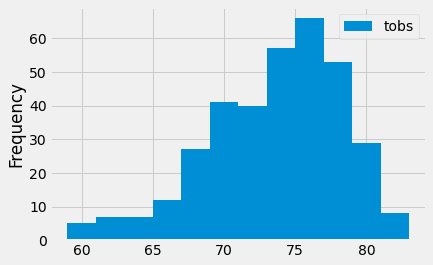

In [25]:
hist_df=pd.DataFrame(station_temp_activity, columns=['date', 'tobs'])
hist_df

hist_df.plot(kind='hist', bins=12)


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
